## IMPORTING PACKAGES

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix




## PREPARING THE DATASETS

#### 0.Importing the Datasets

In [37]:
filename = "penguins.csv"
palmer_penguin = pd.read_csv(filename)
palmer_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Remove missing values

In [38]:
palmer_penguin = palmer_penguin.dropna(axis="index", how="any")
palmer_penguin.head()
print(len(palmer_penguin))

333


### 1.Setting Up the Training and Test Datasets

We will split the original dataset into 4 different splitting strategies, with the proportion of traning and test as follows: 40/60, 60/40, 80/20, and 90/10.

First, we split the original dataset into feature and label columns, as the target we are considering now is 


In [39]:
palmer_penguin_feature = palmer_penguin.drop(columns = ['species'])
palmer_penguin_label = palmer_penguin['species']

Then the feature and label are split into 4 splitting strategies as mentioned above.

In [40]:
training_sizes = {
    "40/60": 0.4,
    "60/40": 0.6,
    "80/20": 0.8,
    "90/10": 0.9,
}

datasets = {}
for name, training_size in training_sizes.items():
    feature_train, feature_test, label_train, label_test = train_test_split(
        palmer_penguin_feature, palmer_penguin_label,
        test_size=(1 - training_size),
        shuffle=True,
        stratify=palmer_penguin_label
    )

    datasets[name] = (feature_train, feature_test, label_train, label_test)



#### Original Set

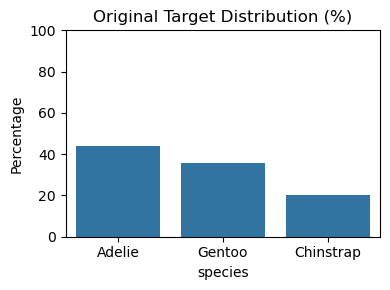

In [41]:

plt.figure(figsize=(4,3))
original_pct = palmer_penguin_label.value_counts(normalize=True) * 100
original_df = pd.DataFrame({
    'species': original_pct.index.astype(str),
    'Percentage': original_pct.values
})

sns.barplot(data=original_df, x='species', y='Percentage')
plt.title("Original Target Distribution (%)")
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.xlabel("species")
plt.tight_layout()
plt.show()

#### Training Set

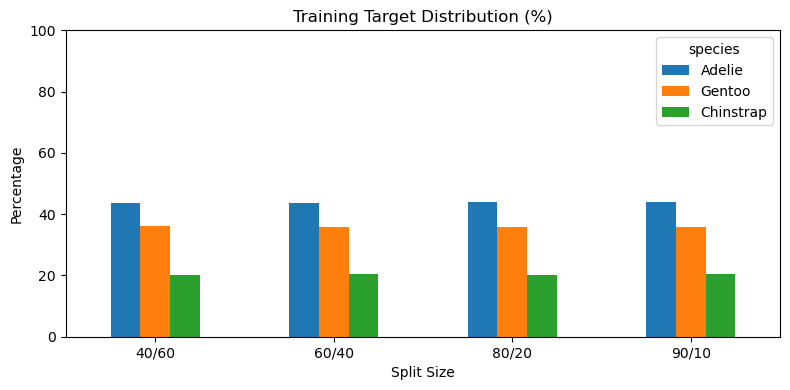

In [42]:
train_distributions = {}

for name, (feature_train, feature_test, label_train, label_test) in datasets.items():
    train_pct = label_train.value_counts(normalize=True) * 100
    train_distributions[name] = train_pct

train_df = pd.DataFrame(train_distributions).T

train_df.plot(kind='bar', figsize=(8, 4), legend=True)
plt.title("Training Target Distribution (%)")
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.xlabel("Split Size")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Test Set

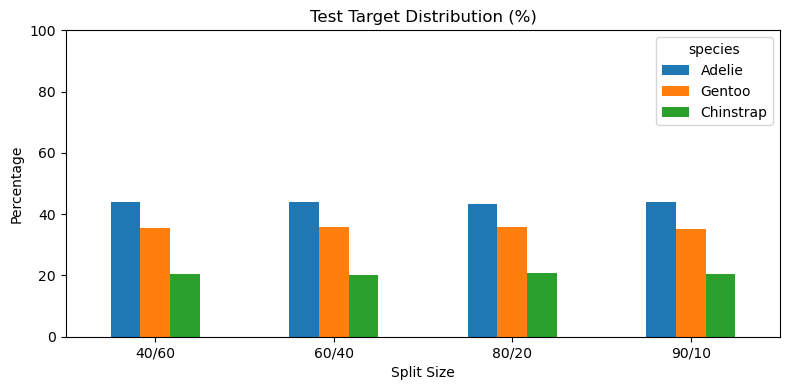

In [43]:
test_distributions = {}

for name, (feature_train, feature_test, label_train, label_test) in datasets.items():
    test_pct = label_test.value_counts(normalize=True) * 100
    test_distributions[name] = test_pct

test_df = pd.DataFrame(test_distributions).T

test_df.plot(kind='bar', figsize=(8, 4), legend=True)
plt.title("Test Target Distribution (%)")
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.xlabel("Split Size")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Categorical handling

In [44]:
import numpy as np
column_transformer = ColumnTransformer(
    transformers=[("categorical", OneHotEncoder(drop="first", sparse_output=False), ['island', 'sex'])],
    remainder="passthrough",
    verbose_feature_names_out=False  
)



label_order = ['Adelie', 'Gentoo', 'Chinstrap']  
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(label_order) 
for name, (feature_train, feature_test, label_train, label_test) in datasets.items():
    feature_train = column_transformer.fit_transform(feature_train)
    feature_test = column_transformer.transform(feature_test)

    label_train = label_encoder.fit_transform(label_train)
    label_test = label_encoder.transform(label_test)

    datasets[name] = (feature_train, feature_test, label_train, label_test)


### 2. Building the Decision Tree Classifiers

In [45]:
models = {}
for name, (feature_train, feature_test, label_train, label_test) in datasets.items():
    model = tree.DecisionTreeClassifier(criterion = "entropy", random_state=42)
    model.fit(feature_train, label_train)
    models[name] = model

graphs = {}

for name, model in models.items():
    dot_data = tree.export_graphviz(
        model, 
        out_file=None,
        filled=True,
        rounded=True,
    )
    graph = graphviz.Source(dot_data)
    graphs[name] = graph


Decision Tree Graph for 40/60 splitting.


(process:8096): Pango-CRITICAL **: 01:00:17.878: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:8096): Pango-CRITICAL **: 01:00:17.878: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:8096): Pango-CRITICAL **: 01:00:17.878: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:8096): Pango-CRITICAL **: 01:00:17.878: pango_font_description_get_family: assertion 'desc != NULL' failed


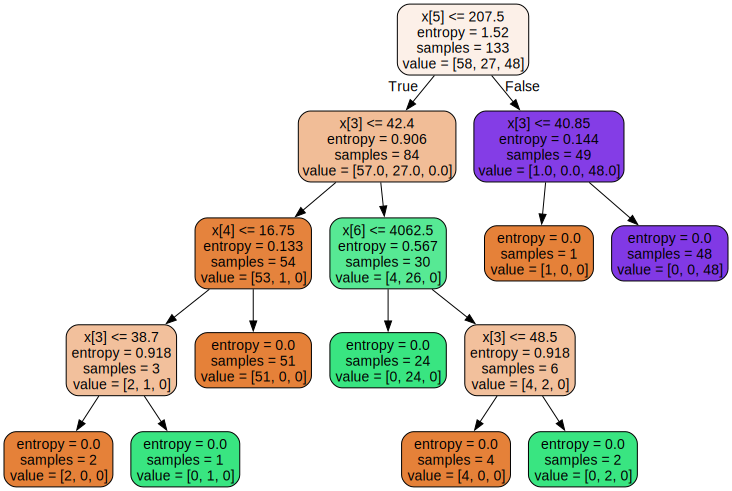

In [46]:
graphs['40/60']

Decision Tree Graph for 60/40 splitting.


(process:18708): Pango-CRITICAL **: 01:00:17.967: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:18708): Pango-CRITICAL **: 01:00:17.967: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:18708): Pango-CRITICAL **: 01:00:17.967: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:18708): Pango-CRITICAL **: 01:00:17.967: pango_font_description_get_family: assertion 'desc != NULL' failed


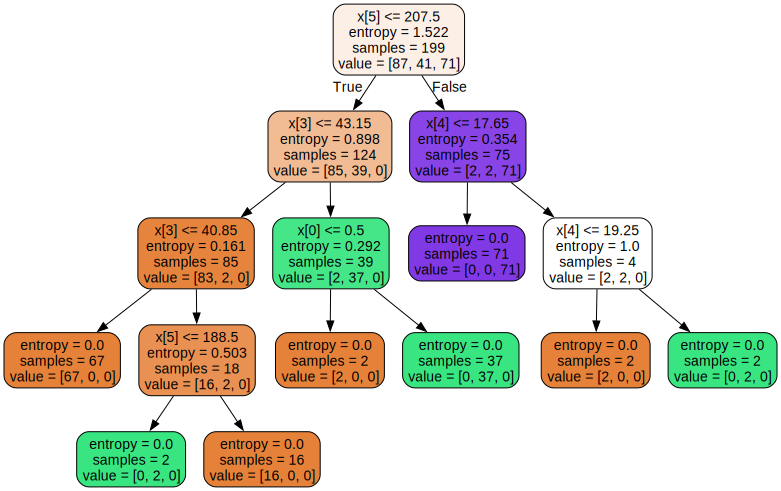

In [47]:
graphs['60/40']

Decision Tree Graph for 80/20 splitting.


(process:22688): Pango-CRITICAL **: 01:00:18.069: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22688): Pango-CRITICAL **: 01:00:18.070: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22688): Pango-CRITICAL **: 01:00:18.070: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22688): Pango-CRITICAL **: 01:00:18.070: pango_font_description_get_family: assertion 'desc != NULL' failed


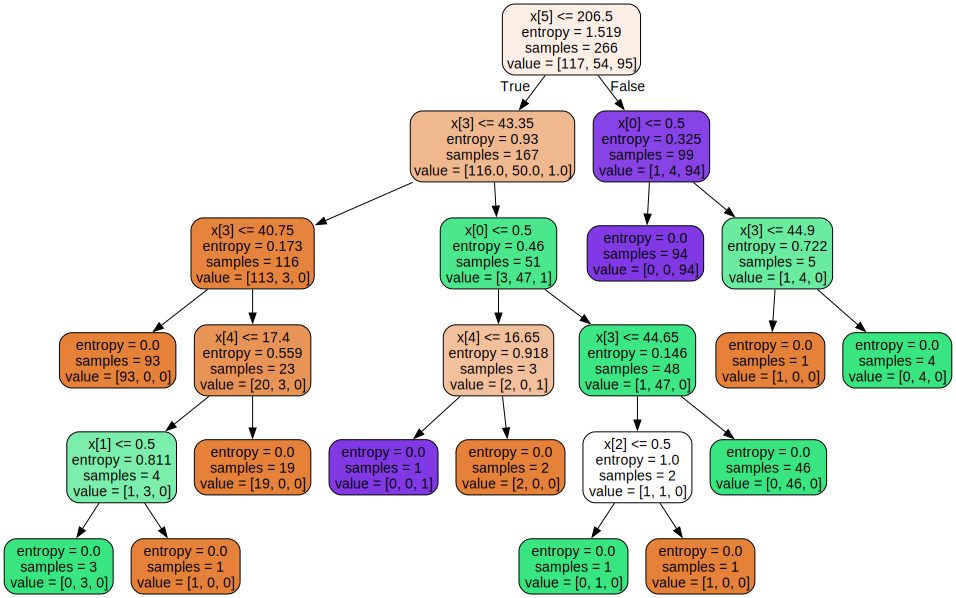

In [48]:
graphs['80/20']

Decision Tree Graph for 90/10 splitting.


(process:21452): Pango-CRITICAL **: 01:00:18.179: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:21452): Pango-CRITICAL **: 01:00:18.179: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:21452): Pango-CRITICAL **: 01:00:18.179: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:21452): Pango-CRITICAL **: 01:00:18.179: pango_font_description_get_family: assertion 'desc != NULL' failed


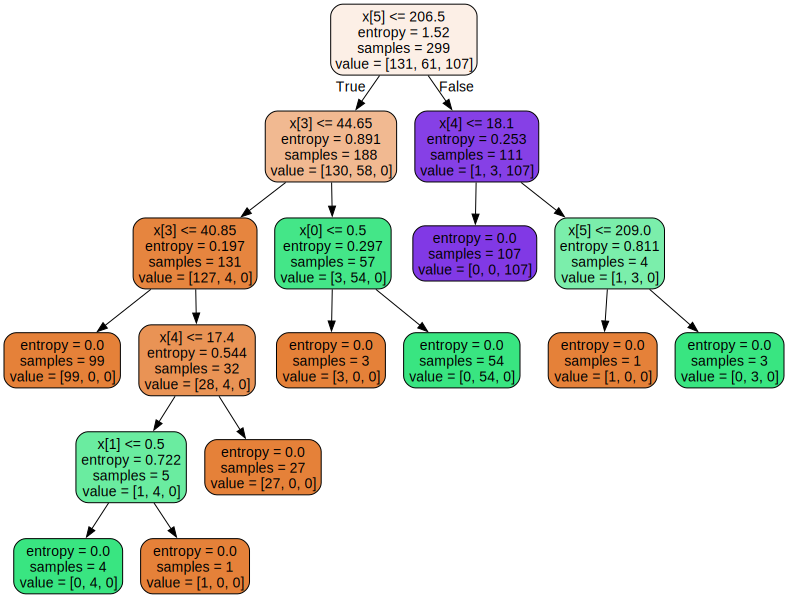

In [49]:
graphs["90/10"]

### 2. Evaluating the Decison Tree Classifiers

In [50]:

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
eval_results = {}
def evaluate_decision_tree_classifier(model, name):
    feature_train, feature_test, label_train, label_test = datasets[name]
    y_pred = model.predict(feature_test)
    y_true = label_test
    report = classification_report(y_true, y_pred, labels=[0,1,2], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    display(report_df.round(2))

    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
    cm_display = ConfusionMatrixDisplay(cm, display_labels = label_encoder.classes_)
    cm_display.plot(cmap = "Blues")
    plt.title("Confusion matrix: " + name)
    plt.show()

    

#### a. 40/60 Splitting

,precision,recall,f1-score,support
0,0.97,0.97,0.97,88.00
1,0.95,0.88,0.91,41.00
2,0.93,0.97,0.95,71.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.95,0.94,0.94,200.00
weighted avg,0.95,0.95,0.95,200.00


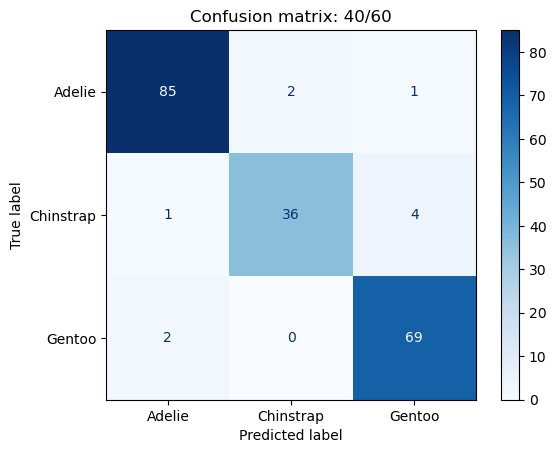

In [51]:
evaluate_decision_tree_classifier(models['40/60'],'40/60')

#### b. 60/40 Splitting

,precision,recall,f1-score,support
0,0.95,0.88,0.91,59.00
1,0.79,0.96,0.87,27.00
2,1.00,0.96,0.98,48.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.91,0.93,0.92,134.00
weighted avg,0.93,0.93,0.93,134.00


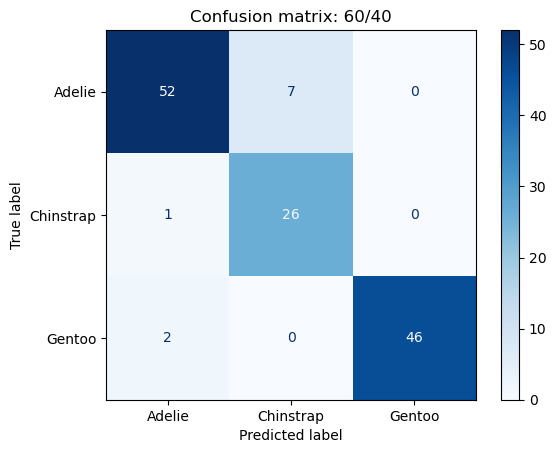

In [52]:
evaluate_decision_tree_classifier(models['60/40'],'60/40')

#### c. 80/20 Splitting

,precision,recall,f1-score,support
0,1.00,0.97,0.98,29.00
1,1.00,1.00,1.00,14.00
2,0.96,1.00,0.98,24.00
accuracy,0.99,0.99,0.99,0.99
macro avg,0.99,0.99,0.99,67.00
weighted avg,0.99,0.99,0.99,67.00


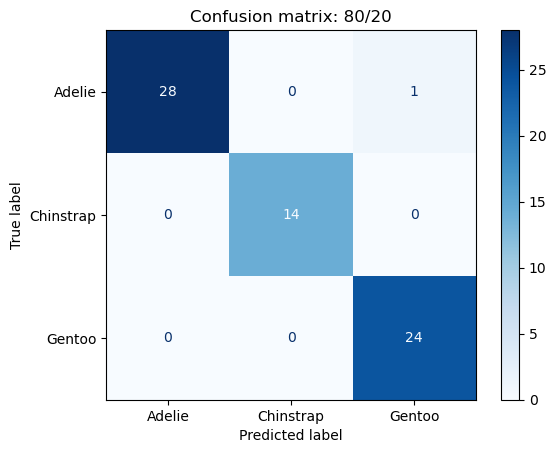

In [53]:
evaluate_decision_tree_classifier(models['80/20'],'80/20')

#### d. 90/10 Splitting

,precision,recall,f1-score,support
0,0.82,0.93,0.88,15.00
1,1.00,0.71,0.83,7.00
2,0.92,0.92,0.92,12.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.91,0.85,0.88,34.00
weighted avg,0.89,0.88,0.88,34.00


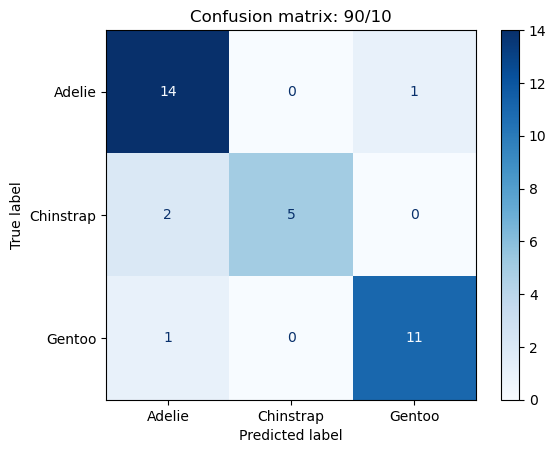

In [54]:
evaluate_decision_tree_classifier(models['90/10'],'90/10')

#### e. Overall Insights

### 4. The Depth and Accuracy of A Decision Tree (80/20 Splitting)

In this section, the task focuses on the 80/20 splitting. We are specifying the maximum depth of a decision tree by testing with the following values: `[None, 2, 3, 4, 5, 6, 7]`. For each depth value, the processing procedure will be: providing the decision tree, visualizing using Graphviz, reporting and visualizing the `accuracy_score`.

As the 80/20 dataset was preprocessed above, we will skip this section.

#### a. Preparing
However, we still have to prepare the testing values.

In [55]:
max_depth_values = [None, 2, 3, 4, 5, 6, 7]

(feature_train, feature_test, label_train, label_test) = datasets['80/20']

#### b. Model Training
After preprocessing the data, we apply the `DecisionTreeClassifier` on the dataset with each depth value.

In [56]:
models = {}

for max_depth in max_depth_values:
    depth_label = f"Depth={max_depth if max_depth is not None else 'None'}"

    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    model.fit(feature_train, label_train)

    models[depth_label] = model

#### c. Visualization
The visualization of the resulting decision trees is processed with Graphviz.

In [57]:
graphs = {}

for max_depth, model in models.items():
    dot_data = tree.export_graphviz(model, out_file=None,
                                    filled=True, rounded=True)
    graph = graphviz.Source(dot_data)

    graphs[max_depth] = graph

Depth = None


(process:5816): Pango-CRITICAL **: 01:00:19.072: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5816): Pango-CRITICAL **: 01:00:19.072: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5816): Pango-CRITICAL **: 01:00:19.072: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5816): Pango-CRITICAL **: 01:00:19.072: pango_font_description_get_family: assertion 'desc != NULL' failed


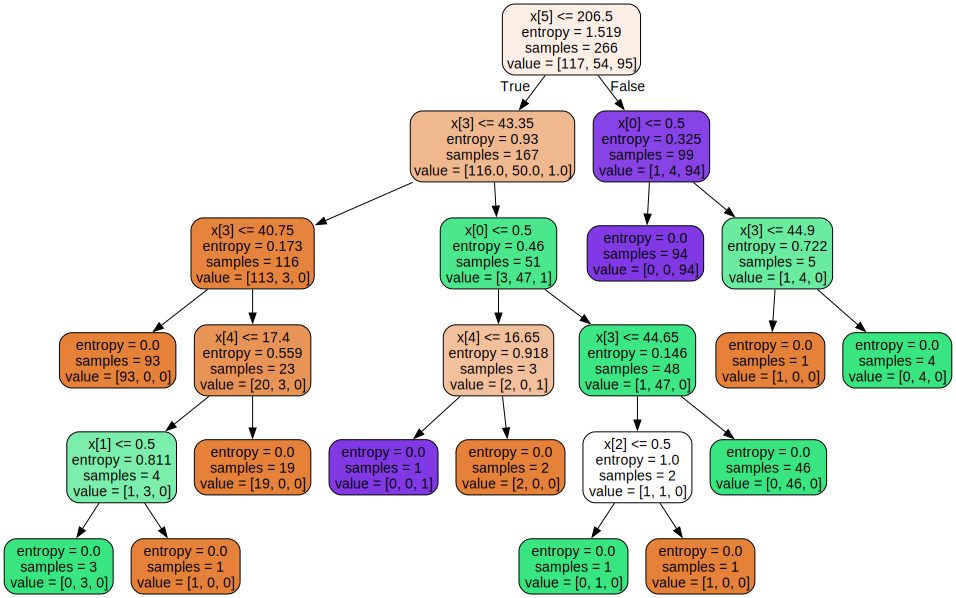

In [58]:
graphs['Depth=None']

Depth = 2


(process:12524): Pango-CRITICAL **: 01:00:19.155: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12524): Pango-CRITICAL **: 01:00:19.155: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12524): Pango-CRITICAL **: 01:00:19.155: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12524): Pango-CRITICAL **: 01:00:19.155: pango_font_description_get_family: assertion 'desc != NULL' failed


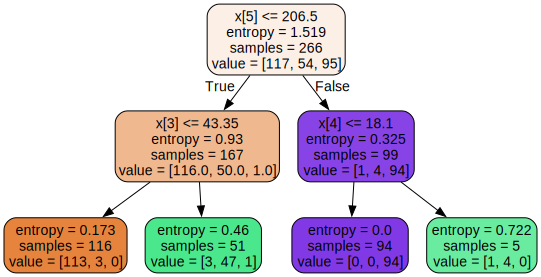

In [59]:
graphs['Depth=2']

Depth = 3


(process:15328): Pango-CRITICAL **: 01:00:19.231: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15328): Pango-CRITICAL **: 01:00:19.231: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15328): Pango-CRITICAL **: 01:00:19.231: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15328): Pango-CRITICAL **: 01:00:19.231: pango_font_description_get_family: assertion 'desc != NULL' failed


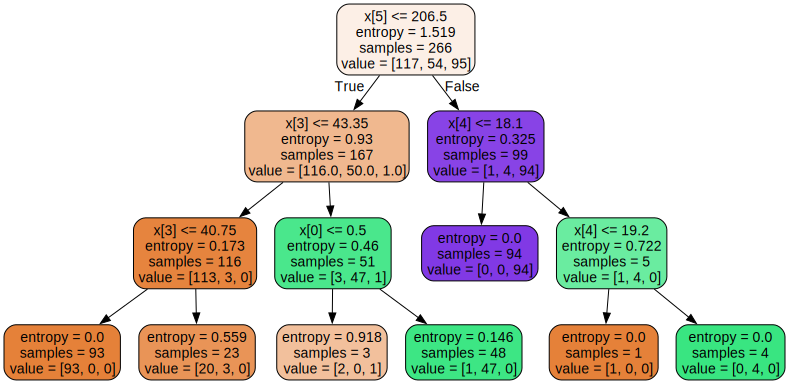

In [60]:
graphs['Depth=3']

Depth = 4


(process:17412): Pango-CRITICAL **: 01:00:19.321: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17412): Pango-CRITICAL **: 01:00:19.321: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17412): Pango-CRITICAL **: 01:00:19.321: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17412): Pango-CRITICAL **: 01:00:19.321: pango_font_description_get_family: assertion 'desc != NULL' failed


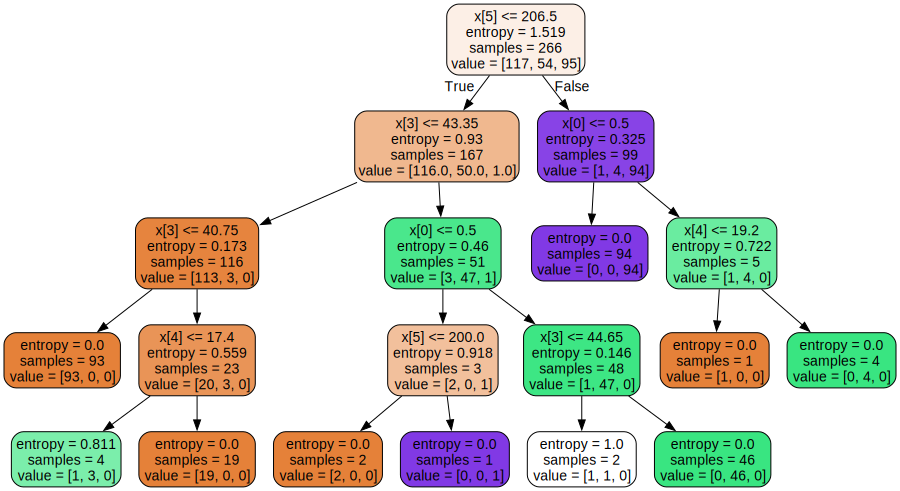

In [61]:
graphs['Depth=4']

Depth = 5


(process:9632): Pango-CRITICAL **: 01:00:19.418: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:9632): Pango-CRITICAL **: 01:00:19.418: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:9632): Pango-CRITICAL **: 01:00:19.418: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:9632): Pango-CRITICAL **: 01:00:19.418: pango_font_description_get_family: assertion 'desc != NULL' failed


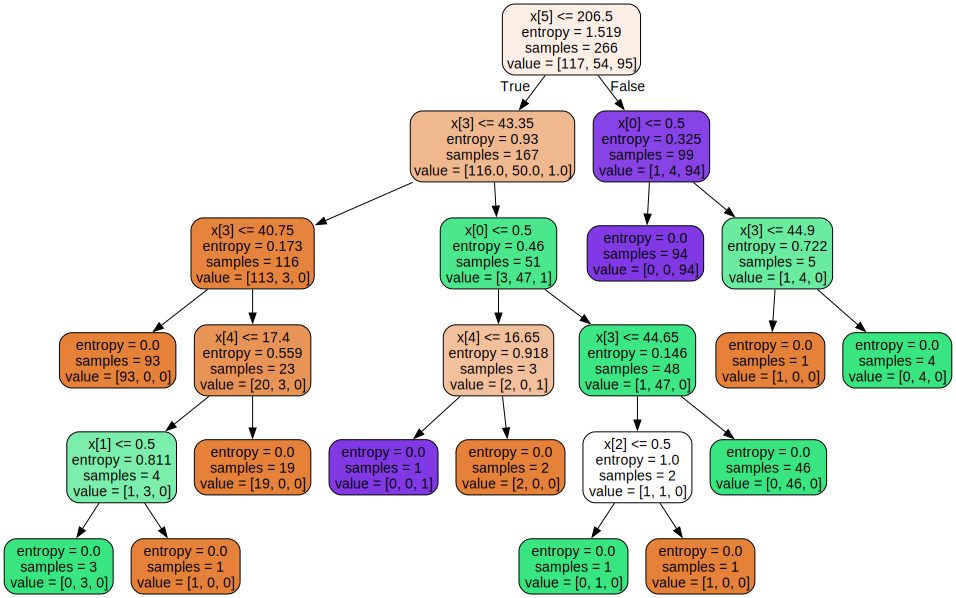

In [62]:
graphs['Depth=5']


Depth = 6


(process:7524): Pango-CRITICAL **: 01:00:19.496: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7524): Pango-CRITICAL **: 01:00:19.496: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7524): Pango-CRITICAL **: 01:00:19.496: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7524): Pango-CRITICAL **: 01:00:19.496: pango_font_description_get_family: assertion 'desc != NULL' failed


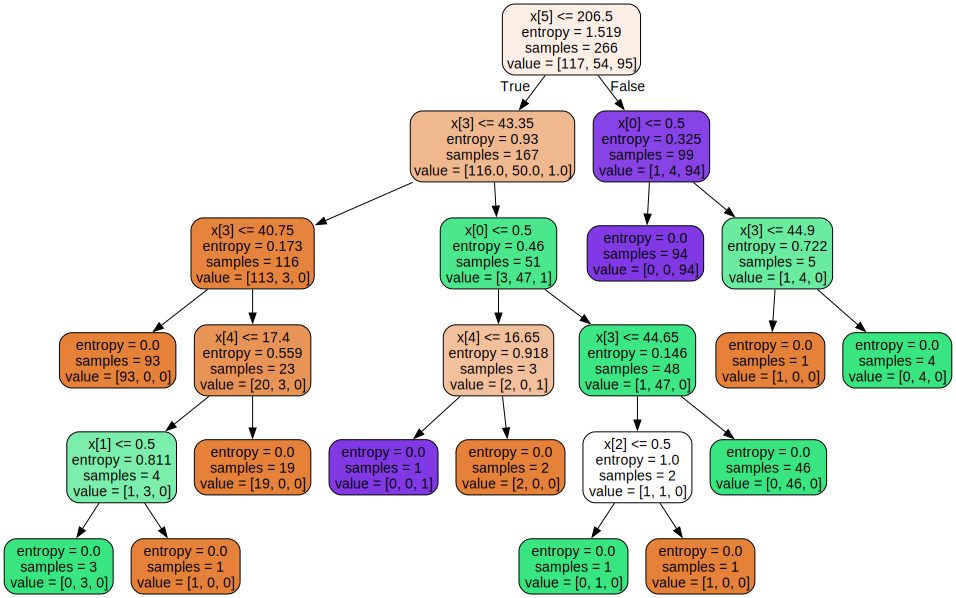

In [63]:
graphs['Depth=6']


Depth = 7


(process:22188): Pango-CRITICAL **: 01:00:19.577: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22188): Pango-CRITICAL **: 01:00:19.577: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22188): Pango-CRITICAL **: 01:00:19.577: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22188): Pango-CRITICAL **: 01:00:19.577: pango_font_description_get_family: assertion 'desc != NULL' failed


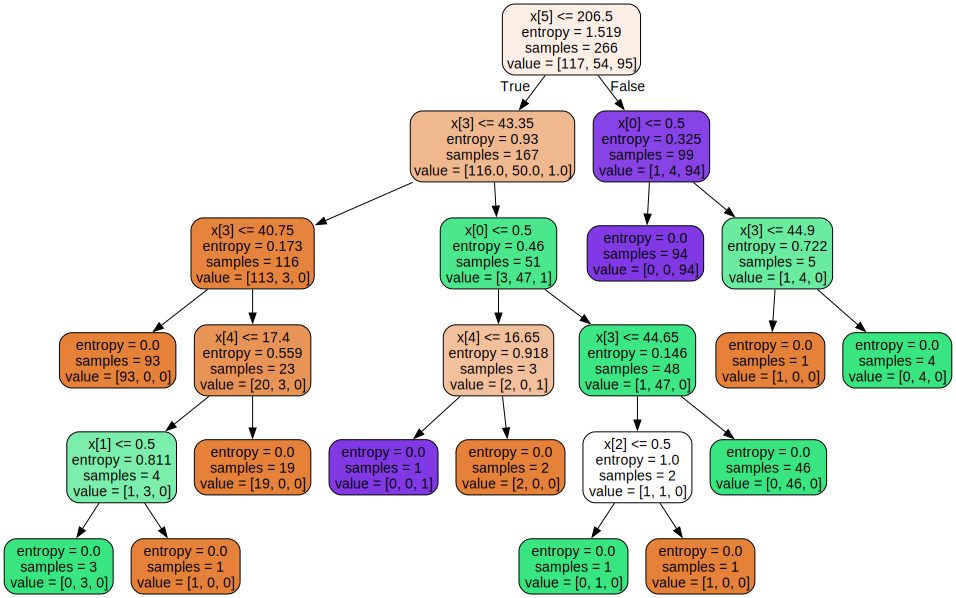

In [64]:
graphs['Depth=6']

#### d. Accuracy Scores

Finally, we will calculate the accuracy scores for each depth value on the test set of the decision tree classifier.

In [65]:
accuracy_scores = {}

for max_depth, model in models.items():
    label_pred = model.predict(feature_test)
    accuracy = accuracy_score(label_test, label_pred)
    accuracy_scores[max_depth] = accuracy

flat_scores = {
    k.replace("Depth=", "").replace("None", "None"): v 
    for k, v in accuracy_scores.items()
}

flat_scores = dict(sorted(
    flat_scores.items(),
    key=lambda x: 1 if x[0] == "None" else int(x[0])
))

accuracy_table = pd.DataFrame([flat_scores], index=["Accuracy"]).round(4)

accuracy_table

,None,2,3,4,5,6,7
Accuracy,0.9851,0.9403,0.9403,0.9701,0.9851,0.9851,0.9851
